In [2]:
# Импорт необходимых библиотек
import numpy as np                                          
import pandas as pd                                          
from datetime import datetime as dt                          
import matplotlib.pyplot as plt                              
from pandas.plotting import register_matplotlib_converters   
import re                                                    
import datetime
%matplotlib inline
import seaborn as sns
from datetime import datetime, timedelta, date

In [3]:
# Открытие файлы для чтения
courses_df = pd.read_csv("Data/courses.csv")
contents_df = pd.read_csv("Data/course_contents.csv")
phases_df = pd.read_csv("Data/progress_phases.csv")
progresses_df = pd.read_csv("Data/progresses.csv")
students_df = pd.read_csv("Data/students.csv ")

In [4]:
# Переименование столбцов для объединения в один общий датафрейм
courses_df.rename(columns={'id':'course_id'}, inplace = True)       
progresses_df.rename(columns={'id':'progress_id'}, inplace = True)   

In [5]:
progresses_df.head()

progress_id                        student_id  \
0  8459fbc07e32ec92bd7b43d7df9bfa89  a6ae278c0eab719b3784e5ea147c128f   
1  a9d173142534e33ce39146017f9c6835  e24062de06d301937b3b3a8e383e3e21   
2  da26551a71cd62bbab844e3e54af7f71  35a36d90b745992b59085c8d54a072e7   
3  cda22f5fb5b5dcfad42b59b91b1938dc  37e8e8179295ae764524223086b0b568   
4  5ead083521d7f2284a43290c743aa93b  37e8e8179295ae764524223086b0b568   

                          course_id  
0  0770b1b039964228294f1f34b29fc2c1  
1  bf27a4bf4ada4c756451703ea62a914f  
2  6e4837f0a65c68efbfdd0594d6774701  
3  abce125a877c2196a3bc7bfbc11b5fc5  
4  17013cd19d25cb3f28dc1b2683721bb9

In [6]:
courses_df.head()

Unnamed: 0                         course_id  \
0           0  943306102e5b067d08a29094f37b8193   
1           1  17013cd19d25cb3f28dc1b2683721bb9   
2           2  ac634845fb0350d0e9d49078aaa4b68f   
3           3  0770b1b039964228294f1f34b29fc2c1   
4           4  abce125a877c2196a3bc7bfbc11b5fc5   

                            title        field  
0         Java-разработчик c нуля  Development  
1              Веб-дизайн Базовый       Design  
2                   Excel Базовый     Business  
3   Руководитель digital-проектов     Business  
4  Веб-вёрстка для начинающих 2.0  Development

In [7]:
# Удаление не нужных столбцов
del courses_df['Unnamed: 0']                                         
                                                                     


In [8]:
courses_df.head()

course_id                           title  \
0  943306102e5b067d08a29094f37b8193         Java-разработчик c нуля   
1  17013cd19d25cb3f28dc1b2683721bb9              Веб-дизайн Базовый   
2  ac634845fb0350d0e9d49078aaa4b68f                   Excel Базовый   
3  0770b1b039964228294f1f34b29fc2c1   Руководитель digital-проектов   
4  abce125a877c2196a3bc7bfbc11b5fc5  Веб-вёрстка для начинающих 2.0   

         field  
0  Development  
1       Design  
2     Business  
3     Business  
4  Development

In [9]:
 # Объединение датафреймов в один общий датафрейм
main_df = phases_df.merge(progresses_df)                            
main_df = main_df.merge(courses_df, how = 'left')
main_df = main_df.merge(contents_df, how = 'left')

In [10]:
main_df.head()

progress_id  module_number  lesson_number status  \
0  a387ab916f402cb3fbfffd29f68fd0ce              2              4   done   
1  a387ab916f402cb3fbfffd29f68fd0ce              1              1   done   
2  a387ab916f402cb3fbfffd29f68fd0ce              2              2   done   
3  a387ab916f402cb3fbfffd29f68fd0ce              1              4   done   
4  a387ab916f402cb3fbfffd29f68fd0ce              1              6   done   

                      start_date                    finish_date  \
0  2018-06-23 08:28:50.681065+00  2018-06-23 08:28:52.439542+00   
1  2018-06-20 14:25:21.783762+00  2018-06-20 15:45:07.717209+00   
2  2018-06-23 08:18:09.653771+00  2018-06-23 08:18:12.784616+00   
3   2018-06-20 16:00:06.36178+00  2018-06-21 19:09:30.845034+00   
4  2018-06-21 19:10:36.957891+00  2018-06-28 15:59:25.320418+00   

                         student_id                         course_id  \
0  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
1  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
2  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
3  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   
4  768c2987a744c51ce64a5993a2a94eaf  c9fcb746d51e41bc5a217002d081454b   

                title   field                             module_title  \
0  Веб-дизайн PRO 2.0  Design                    Концептуальный дизайн   
1  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   
2  Веб-дизайн PRO 2.0  Design                    Концептуальный дизайн   
3  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   
4  Веб-дизайн PRO 2.0  Design  Специализация и личное позиционирование   

                      lesson_title                          lesson_token  \
0                Практика — мокапы  7df8adef-1259-4b72-9bf2-353c73389d06   
1                      Интро курса  df1a1f20-cdf7-443d-b25b-0a4b990b84d9   
2  Что такое концептуальный дизайн  f23b1890-9365-406f-816b-04864cefe58f   
3          Личное позиционирование  9dd50916-4aa6-4a73-b86c-56a1bd7753c8   
4                  Домашняя работа  43e1fbdd-1ee9-4ed5-a577-4dadd80c02b3   

   is_video  is_homework  
0      True        False  
1      True        False  
2      True        False  
3      True        False  
4     False         True

# 1.1. Общее количество курсов в датасете

In [11]:
course_df=main_df.groupby(['title']).size().reset_index(name='count')
course_df=len(course_df)
print(f"Всего курсов: {course_df}")

Всего курсов: 15


In [12]:
print(f'Всего курсов:{main_df.course_id.nunique()}')

Всего курсов:15


# 1.2. Количество модулей на каждом курсе,

In [13]:
main_df.groupby('title')['module_title'].nunique().reset_index().sort_values(by='module_title',ascending=True).reset_index(drop=True)


title  module_title
0   PHP-разработчик с 0 до PRO. Часть 1             8
1        Веб-вёрстка для начинающих 2.0             8
2                         Excel Базовый             9
3               Java-разработчик c нуля             9
4              SMM-маркетолог от А до Я            11
5                      Java-разработчик            17
6                    Веб-дизайн PRO 2.0            17
7                    Веб-дизайн Базовый            17
8         Руководитель digital-проектов            17
9                     JavaScript с нуля            18
10        Интернет-маркетолог от Ingate            18
11                Веб-дизайн с нуля 2.0            19
12                            UX-дизайн            20
13                      Веб-разработчик            20
14                 Анимация интерфейсов            21

In [14]:
main_df.groupby('title').agg(module_count = ('module_number','max'))

module_count
title                                            
Excel Базовый                                   9
Java-разработчик                               17
Java-разработчик c нуля                         9
JavaScript с нуля                              18
PHP-разработчик с 0 до PRO. Часть 1             8
SMM-маркетолог от А до Я                       11
UX-дизайн                                      20
Анимация интерфейсов                           21
Веб-вёрстка для начинающих 2.0                  8
Веб-дизайн PRO 2.0                             17
Веб-дизайн Базовый                             17
Веб-дизайн с нуля 2.0                          19
Веб-разработчик                                20
Интернет-маркетолог от Ingate                  18
Руководитель digital-проектов                  17

# 1.3.  Количество уроков в каждом модуле на каждом курсе

In [15]:
course_lessons = main_df.groupby(['title', 'module_title'])['lesson_number'].nunique().reset_index()
course_lessons

title  \
0                    Excel Базовый   
1                    Excel Базовый   
2                    Excel Базовый   
3                    Excel Базовый   
4                    Excel Базовый   
..                             ...   
224  Руководитель digital-проектов   
225  Руководитель digital-проектов   
226  Руководитель digital-проектов   
227  Руководитель digital-проектов   
228  Руководитель digital-проектов   

                                          module_title  lesson_number  
0                            Визуализация данных Excel              5  
1                            Основной функционал Excel             11  
2              Основной функционал Excel (продолжение)              7  
3                                Сводные таблицы Excel              5  
4       Формулы и функции Excel. Более сложные формулы              5  
..                                                 ...            ...  
224                  Решение факапов. Lean/TOC. Обзор.              5  
225                 Требовательность digital-продюсера              4  
226                                Управление временем              4  
227  Управление дизайнерами. Разработка дизайна по ...              7  
228                         Экологичный путь менеджера              4  

[229 rows x 3 columns]

In [16]:
# Выбрал нужные колонки из основного датасета
courses_lesson = main_df[['title', 'module_title', 'lesson_title']]
courses_lesson.head()

title                             module_title  \
0  Веб-дизайн PRO 2.0                    Концептуальный дизайн   
1  Веб-дизайн PRO 2.0  Специализация и личное позиционирование   
2  Веб-дизайн PRO 2.0                    Концептуальный дизайн   
3  Веб-дизайн PRO 2.0  Специализация и личное позиционирование   
4  Веб-дизайн PRO 2.0  Специализация и личное позиционирование   

                      lesson_title  
0                Практика — мокапы  
1                      Интро курса  
2  Что такое концептуальный дизайн  
3          Личное позиционирование  
4                  Домашняя работа

In [17]:
count_lessons = courses_lesson.set_index('module_title').groupby(level=0)['lesson_title'].agg([('Quantity of lessons','nunique')])
count_lessons.head(229)

Quantity of lessons
module_title                                                    
 Адаптивность и мобильная версия                               6
 Введение в UX                                                 5
 Визуализация данных Excel                                     5
12 принципов анимации от Walt Disney Studio                    3
3D-элементы в Photoshop                                        4
...                                                          ...
Экзаменационная тема                                           1
Экзаменационное задание                                        1
Экологичный путь менеджера                                     4
Юзабилити: разработка эффективного сайта                       4
Юридическая сторона рекламы                                    2

[215 rows x 1 columns]

In [18]:
main_df.groupby(['title','module_title']).agg(lesson_count = ('lesson_number','max'))

lesson_count
title                         module_title                                                    
Excel Базовый                  Визуализация данных Excel                                     5
                              Основной функционал Excel                                     11
                              Основной функционал Excel (продолжение)                        7
                              Сводные таблицы Excel                                          5
                              Формулы и функции Excel. Более сложные формулы                 5
...                                                                                        ...
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              5
                              Требовательность digital-продюсера                             4
                              Управление временем                                            4
                              Управление дизайнерами. Разработка дизайна по s...             7
                              Экологичный путь менеджера                                     4

[229 rows x 1 columns]

# 1.4. Медианное количество уроков в модуле на каждом курсе

In [19]:
main_df.groupby(['title']).agg(lesson_count_median = ('lesson_number','median'))

lesson_count_median
title                                                   
Excel Базовый                                          4
Java-разработчик                                       4
Java-разработчик c нуля                                5
JavaScript с нуля                                      4
PHP-разработчик с 0 до PRO. Часть 1                    3
SMM-маркетолог от А до Я                               3
UX-дизайн                                              3
Анимация интерфейсов                                   2
Веб-вёрстка для начинающих 2.0                         4
Веб-дизайн PRO 2.0                                     3
Веб-дизайн Базовый                                     3
Веб-дизайн с нуля 2.0                                  3
Веб-разработчик                                        1
Интернет-маркетолог от Ingate                          5
Руководитель digital-проектов                          3

# 1.5. Количество учеников на каждом курсе

In [20]:
student_count_by_course = main_df.groupby(['title'])['student_id']\
                                .nunique().reset_index()\
                                .rename(columns={'student_id': 'students_count'})\
                                .sort_values(by='students_count', ascending=False)\
                                .reset_index(drop=True)
student_count_by_course

title  students_count
0         Интернет-маркетолог от Ingate            2168
1                 Веб-дизайн с нуля 2.0            2014
2        Веб-вёрстка для начинающих 2.0            2004
3                    Веб-дизайн PRO 2.0            1711
4                             UX-дизайн            1151
5                     JavaScript с нуля             966
6   PHP-разработчик с 0 до PRO. Часть 1             854
7                         Excel Базовый             782
8                      Java-разработчик             763
9         Руководитель digital-проектов             685
10                      Веб-разработчик             628
11                 Анимация интерфейсов             598
12              Java-разработчик c нуля             581
13                   Веб-дизайн Базовый             518
14             SMM-маркетолог от А до Я             506

In [21]:
main_df.groupby(['title']).agg(students_count = ('student_id', 'nunique'))

students_count
title                                              
Excel Базовый                                   782
Java-разработчик                                763
Java-разработчик c нуля                         581
JavaScript с нуля                               966
PHP-разработчик с 0 до PRO. Часть 1             854
SMM-маркетолог от А до Я                        506
UX-дизайн                                      1151
Анимация интерфейсов                            598
Веб-вёрстка для начинающих 2.0                 2004
Веб-дизайн PRO 2.0                             1711
Веб-дизайн Базовый                              518
Веб-дизайн с нуля 2.0                          2014
Веб-разработчик                                 628
Интернет-маркетолог от Ingate                  2168
Руководитель digital-проектов                   685

# 1.6. Минимальный, максимальный, средний, медианный возраст студенто

In [22]:
   # Удаление строк с Nan-значениями
students_df = students_df.dropna(subset=['birthday']).reset_index(drop=True)
students_df.fillna(value='Unknown', inplace=True)

In [23]:
# Отфильтровка по возрастам студентов от 10 до 100 лет
students_df = students_df[(students_df.birthday > '1921-01-01') & (students_df.birthday < '2010-01-01')]

In [24]:
# Столбец birthday ппереводим к типу datetime
students_df['birthday'] = pd.to_datetime(students_df['birthday'])
# Создание нового столбца 'age' содержащего
students_df['age'] = (pd.to_datetime('today') - students_df['birthday']) / timedelta(days=365)

In [25]:
# Вывод результата на экран

min_age=round(students_df['age'].min())
max_age = round(students_df['age'].max())
mean_age = round(students_df['age'].mean())
median_age =round(students_df['age'].median())

print(f'Минимальный возраст:', min_age)
print(f'Максимальный возраст:', max_age)
print(f'Средний возраст:', mean_age)
print(f'Медианный возраст:', median_age)

Минимальный возраст: 11
Максимальный возраст: 100
Средний возраст: 30
Медианный возраст: 30


# 1.7. Минимальный, максимальный, средний, медианный возраст студентов на каждом курсе.

In [26]:
# Переименование столбцов для объединения в один датафрейм
students_df = students_df.rename(columns = {'id':'student_id'})     
progresses_df.merge(courses_df).merge(students_df).groupby('title').agg(age_max = ('age', 'max'), 
                                                          age_min = ('age', 'min'),
                                                          age_mean = ('age', 'mean'),
                                                          age_median = ('age', 'median'))

age_max    age_min   age_mean  \
title                                                                  
Excel Базовый                        61.807833  17.402353  34.977786   
Java-разработчик                     65.503723  15.457148  30.680765   
Java-разработчик c нуля              55.950299  15.133860  30.877275   
JavaScript с нуля                    60.276326  14.698244  29.951204   
PHP-разработчик с 0 до PRO. Часть 1  75.914682  14.698244  30.859632   
SMM-маркетолог от А до Я             52.955778  18.229751  30.375502   
UX-дизайн                            86.092764  16.166737  31.548699   
Анимация интерфейсов                 52.196874  16.166737  30.965732   
Веб-вёрстка для начинающих 2.0       60.276326  14.569477  29.971516   
Веб-дизайн PRO 2.0                   60.216052  15.791394  29.828312   
Веб-дизайн Базовый                   52.092764  16.750299  29.935230   
Веб-дизайн с нуля 2.0                76.481805  14.459888  29.549487   
Веб-разработчик                      51.972216  14.698244  29.493524   
Интернет-маркетолог от Ingate        91.298244  17.380436  32.604189   
Руководитель digital-проектов        55.837970  19.563997  32.904086   

                                     age_median  
title                                            
Excel Базовый                         35.000983  
Java-разработчик                      29.846189  
Java-разработчик c нуля               30.116052  
JavaScript с нуля                     29.150299  
PHP-разработчик с 0 до PRO. Часть 1   29.862627  
SMM-маркетолог от А до Я              29.558518  
UX-дизайн                             31.029751  
Анимация интерфейсов                  30.388655  
Веб-вёрстка для начинающих 2.0        29.092764  
Веб-дизайн PRO 2.0                    28.824271  
Веб-дизайн Базовый                    28.995504  
Веб-дизайн с нуля 2.0                 28.462627  
Веб-разработчик                       28.879066  
Интернет-маркетолог от Ingate         31.754408  
Руководитель digital-проектов         32.572216

# 2. Постройте bar-chart, отражающий количество студентов на каждом курсе. Ticks нужно развернуть так, чтобы они были читаемы

In [27]:
# В новом датафрейме используем функцию агрегирования для подсчета уникальных id студентов
                                                                                     
graph_df = main_df.groupby('title').agg(students_count = ('student_id', 'nunique'))  

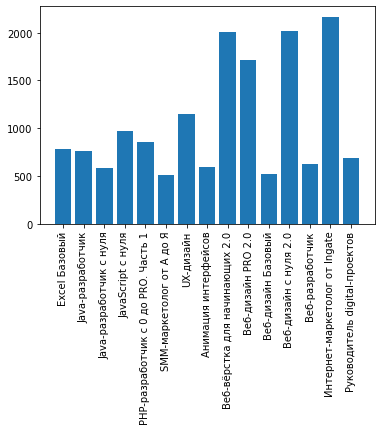

In [28]:
# Установка списка подписей для оси X и Y, а также формирование столбчаой диаграмы

fig, subplot = plt.subplots()                                              
x_labels = [i for i in graph_df.index]                                 
subplot.bar(graph_df.index.values, graph_df['students_count'].values) 
plt.xticks(graph_df.index, rotation = 'vertical', labels = x_labels)   
plt.show()                                                             

# 3. (m) Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий количество студентов на каждом курсе.

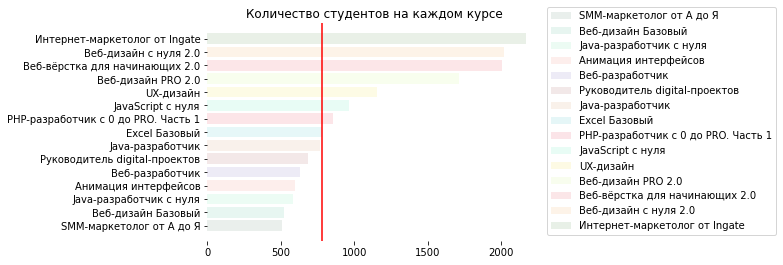

In [29]:
# Производим сортировку значений в датафрейме по количеству студентов, для формирования горизонтальной диаграмы
# Обозначение подписей по оси У и установка прозрачности графика
# Вычисление медианного значения количества студентов на каждом курсе, формирование линии медианы на графике 
graph_df.sort_values('students_count', inplace = True)                
fig, subplot = plt.subplots()                                         
wedges = subplot.barh(graph_df.index.values,                          
                      graph_df['students_count'].values,              
                      color = np.random.rand(15, 3),                  
                      label=graph_df.index.values.all(), alpha = 0.1) 
subplot.set_title('Количество студентов на каждом курсе')             
plt.box(on=None)    

x = np.median(graph_df['students_count'])                             
line = subplot.vlines(x,                                  
                      0,
                      1,
                      transform=subplot.get_xaxis_transform(),
                      color='red',
                      label = 'медиана')                             
plt.legend(wedges, graph_df.index,                                    
          loc="best",
          bbox_to_anchor=(1, 0.1, 0, 1))
plt.show()  

# 4. На основании рассчитанных значений опишите данные (описание должно быть полным и покрывать все полученные выше метрики) 

1. В датасете содержится общая информация о структуре курса, о количестве студентов на каждом курсе и их возраст. 
2. Всего 15 курсов и 15 модулей в среднем. Каждый модуль состоит из 4 уроков в среднем.
3. На курсах учатся слушатели от 25 до 35 лет.
4. Многие курсы включают в себя от 6 до 20 модуля.
5. Максимальное количество студентов на курсе "Интернет-маркетолог от Ingate" - 2168, минимальное на курсе "SMM-маркетолог от А до Я" - 506.
6. Слушатели чей возраст выше 30 лет особой популярностью пользуется курсы "Excel Базовый", "Интернет-маркетолог от Ingate", "Руководитель digital проектов".
Слушатели чей возраст 27 лет популярны курсы Веб-дизайн с нуля 2.0", "Веб-верстка для начинающих 2.0", "Веб-дизайн PRO 2.0", "UX-дизайн".
Слушатели моложе 27 лет популярны курсы Java.
7. Медианное значение возраста по всему датасету составляет 29 лет


## 2. Расчет потенциальной нагрузки на преподавателей

1. **(p)** Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.
2. **(m)** На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.
3. **(m)** На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
4. **(p)** Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)
5. **(m)** Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы
6. **(m)** Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно ⭐
7. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

# 2.1.  Рассчитать прирост студентов на каждом курсе в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно). Считать дату начала прохождения курса студентом по дате начала первой домашней работы.

In [30]:
# Форматирование строк даты в основном датафрейме и формирование нового датафрейма в котором только первые модули
main_df['start_date'] = main_df.loc[:,'start_date'].map(lambda x: dt.strptime(re.split('[.+]',
                                                                                       str(x))[0],'%Y-%m-%d %H:%M:%S'))
graph_gr = main_df.copy()

In [31]:
# Форматирование даты в столбце дат начала выполнения заданий
graph_gr['start_date'] = main_df.loc[:,'start_date'].map(lambda x: dt.strftime(x,'%Y-%m'))

In [32]:
# Формирование датафрейма, в котором содержаться все даты активностей на каждом курсе и группировка дат по каждому курсу 
# в датафрейме с датами

dates_df = graph_gr.loc[:,['title',"start_date"]]
dates_df = dates_df.groupby(['title', 'start_date']).sum()

In [33]:
# Сброс индексов в названия столбцов для возможности дальнейшего объединения с датафреймом прироста 
# Формирование фильтра по приросту только первые модули и домашние задания
dates_df.reset_index(level=[0,1], inplace = True)
graph_gr = graph_gr[(main_df['module_number'] == 1) & (main_df['is_homework'] == True)]

# Производим группировку с агрегированием подсчета уникальных студентов
graph_gr = graph_gr.groupby(['title', 'start_date']).agg(growth = ('student_id', 'nunique'))


In [34]:
# Сброс индексов в названия столбцов для возможности дальнейшего объединения
graph_gr.reset_index(level=[0,1], inplace = True)

# Объединение датафреймов с приростом и с общим списком дат
graph_gr = dates_df.merge(graph_gr, how = 'left').fillna(0)

# Установка иерархических индексов
graph_gr.set_index(['title', 'start_date'], inplace = True)
graph_gr

growth
title                         start_date        
Excel Базовый                 2018-01        0.0
                              2018-02        6.0
                              2018-03        3.0
                              2018-04        0.0
                              2018-05        3.0
...                                          ...
Руководитель digital-проектов 2019-03       36.0
                              2019-04       17.0
                              2019-05       25.0
                              2019-06       15.0
                              2019-07       20.0

[287 rows x 1 columns]

# 2.2. На основании первого пункта построить line-graph с приростом студентов в каждом месяце для каждого курса. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы.

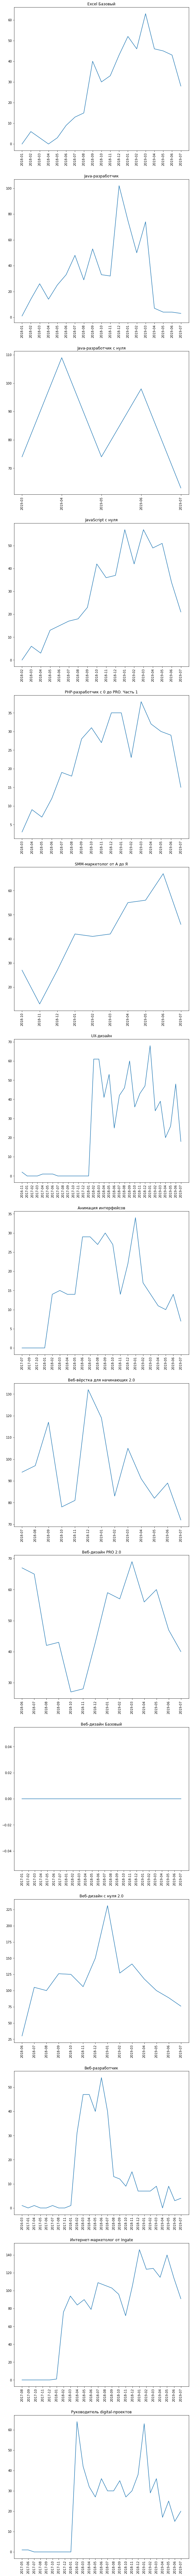

In [35]:
# Установка размеров Figure для его отображения, создание переменной для счетчика порядкового номера координатной оси
# Запуск цикла по каждому значению в списке курсов, добавление координатной оси, задание значений по оси Х и по оси У
# Формирование линейного графика по заданным значениям и установка подписи графика согласно текущему значению из списка курсов
# Установка расположения подписей на оси Х.
fig = plt.figure(figsize = (10,150)) 
s = 0                                
for i in list(graph_gr.index.levels[0]): 
    s+=1
    subplot = fig.add_subplot(15,1,s)             
    x_ticks = graph_gr.loc[i].index                 
    y_ticks = graph_gr.loc[i,'growth']              
    x_labels = [i for i in graph_gr.loc[i].index]  
    subplot.plot(x_ticks, y_ticks)                  
    subplot.set_title(i)                            
    plt.xticks(graph_gr.loc[i].index, rotation = 'vertical', labels = x_labels)  
plt.show() 


# 2.3. На основании первого пункта построить line-graph с несколькими линиями, отражающими прирост студентов в каждом месяце для каждого курса. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая прирост, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 

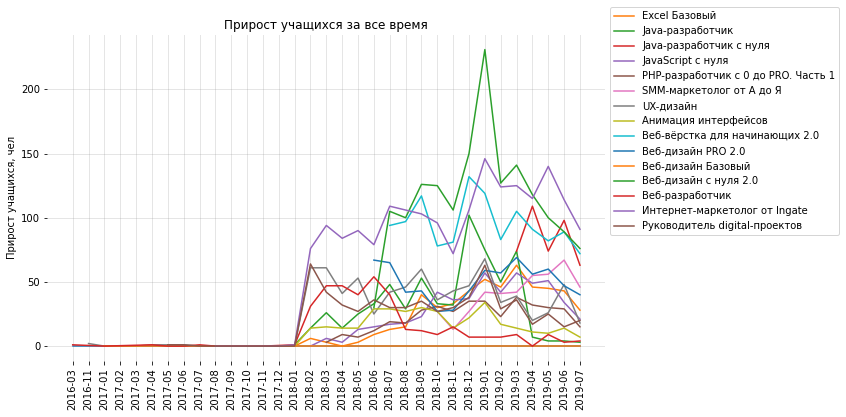

In [36]:
# Построение графика с разметкой по датам на всем диапазоне значений.Установка значений по оси Х и по оси У.
# С помощью цикла присвоение занчений по оси Х и по оси У по каждому значению в списке курсов и формирование графика с сеткой.

fig,subplot = plt.subplots(figsize = (10,6))                   
x_ticks = graph_gr.index.levels[1]                             
y_ticks = [0 for i in range(len(graph_gr.index.levels[1]))]     
subplot.plot(x_ticks, y_ticks)                                
for i in list(graph_gr.index.levels[0]):             
    x_ticks = graph_gr.loc[i].index                  
    y_ticks = graph_gr.loc[i,'growth']               
    subplot.plot(x_ticks, y_ticks, label = i)                   
    x_labels = [i for i in graph_gr.index.levels[1]] #
    plt.xticks(graph_gr.index.levels[1],
               rotation = 'vertical',
               labels = x_labels)       
plt.box(on = None)                       
plt.grid(color='grey',
         linestyle='-',
         linewidth=1,
         alpha = 0.2)                   
plt.legend(loc="best",
          bbox_to_anchor=(1, 0.1, 0, 1))           
subplot.set_title('Прирост учащихся за все время') 
subplot.set_ylabel('Прирост учащихся, чел')       
plt.show()

# 2.4.  Рассчитать количество прогрессов по выполнению домашних работ в каждом месяце за всю историю (каждый месяц в диапазоне от марта 2016 до июля 2019 включительно) для каждого курса. Учитывать, что выполнение домашнего задания может перетекать из одного месяца в другой (такие дз надо включать в общее число прогрессов для всех месяцев, которые покрывает срок выполнения этих дз)

In [37]:
# В новый датасет копируем основной датасет
graph_done = main_df.copy()

# Производим фильтрацию нового датасета в котором все задания являются домашними работами
graph_done = graph_done[(graph_done['is_homework']==True)]

# Форматирование столбца с датами начала работ в удобную форму
graph_done['start_date'] = graph_done.loc[:,'start_date'].map(lambda x: 
                                                                dt.strftime(dt.strptime(re.split('[.+]',str(x))[0],
                                                                                        '%Y-%m-%d %H:%M:%S'),"%Y-%m"))
# Определяем функцию форматирования дат окончаний работ. Если есть Nan-значений, то возвращает конечную дату в датасете
def dates_format(x):
    if isinstance(x,str) == True:
        date = dt.strftime(dt.strptime(re.split('[.+]',str(x))[0],'%Y-%m-%d %H:%M:%S'),"%Y-%m")
    else:
        date = '2019-07'
    return date

# Определяем функцию форматирования дат окончаний работ. Если есть Nan-значений, то возвращает конечную дату в датасете
graph_done['finish_date'] = graph_done.loc[:,'finish_date'].map(lambda x: dates_format(x))

graph_done = graph_done.loc[:,['title','start_date','finish_date']]
graph_done.set_index(['title','start_date'], inplace = True)
graph_done.reset_index(inplace = True)
graph_done

for i in graph_done.index:
    date_range = pd.date_range(graph_done.loc[i,'start_date'],
                               graph_done.loc[i,'finish_date'], freq='M')
    date_range = list(map(lambda x: dt.strftime(dt.strptime(str(x),'%Y-%m-%d %H:%M:%S'),'%Y-%m'), date_range))[1:]

for date in date_range:
        graph_done.loc[len(graph_done)] = [graph_done.loc[i,'title'],
                                            date,
                                            graph_done.loc[i,'finish_date']]

In [38]:
# Создание нового столбца-счётчика в датасете
graph_done['counter'] = 1

In [39]:
# Группировка датасета в котором счетчик подсчитывает сумму заданий законченных в текущем месяце по каждому курсу
graph_done = graph_done.groupby(['title', 'start_date']).sum()
graph_done

counter
title                         start_date         
Excel Базовый                 2018-02          37
                              2018-03           6
                              2018-04          12
                              2018-05          16
                              2018-06          32
...                                           ...
Руководитель digital-проектов 2019-03         264
                              2019-04         175
                              2019-05         203
                              2019-06         157
                              2019-07         110

[251 rows x 1 columns]

# 2.5. Построить line-graph по четвертому пункту. 15 графиков. Графики должны иметь заголовки, оси должны быть подписаны. Ticks нужно развернуть так, чтобы они были читаемы

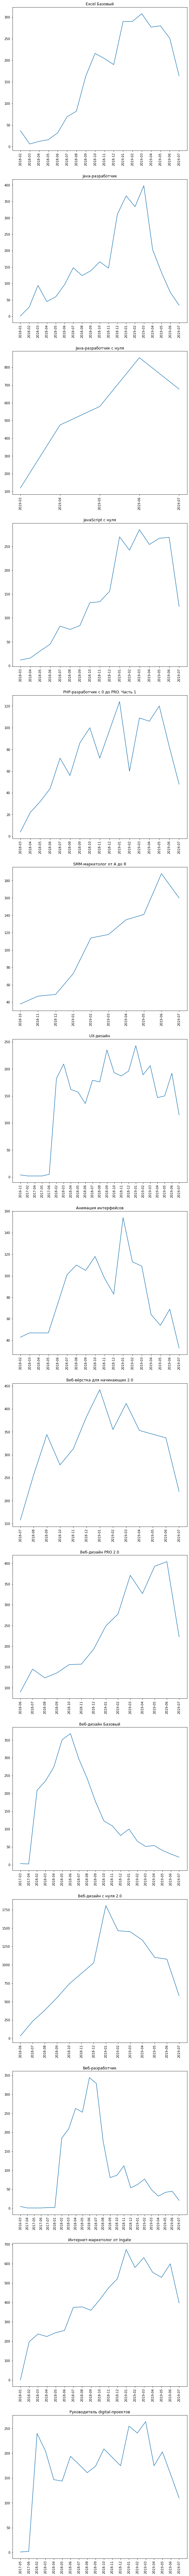

In [40]:
# Определение новой переменной для счетчика порядкового номера координатной оси
# Запускаем цикл значений по оси Х и  по оси У по каждому значению в списке курсов, с добавлением координатной оси.

fig = plt.figure(figsize = (10,150))        
s = 0                                       
for i in list(graph_done.index.levels[0]):  
    s+=1
    subplot = fig.add_subplot(15,1,s)       
    x_ticks = graph_done.loc[i].index      
    y_ticks = graph_done.loc[i,'counter']  
    x_labels = [i for i in graph_done.loc[i].index]  
    subplot.plot(x_ticks, y_ticks)                   
    subplot.set_title(i)                             
    plt.xticks(graph_done.loc[i].index, rotation = 'vertical', labels = x_labels)
plt.show()

# 2.6. Построить один line-graph для всех курсов по четвертому пункту. 15 линий на графике. Ticks нужно развернуть так, чтобы они были читаемы. График должен иметь заголовок. Ось, отражающая количество прогрессов, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 

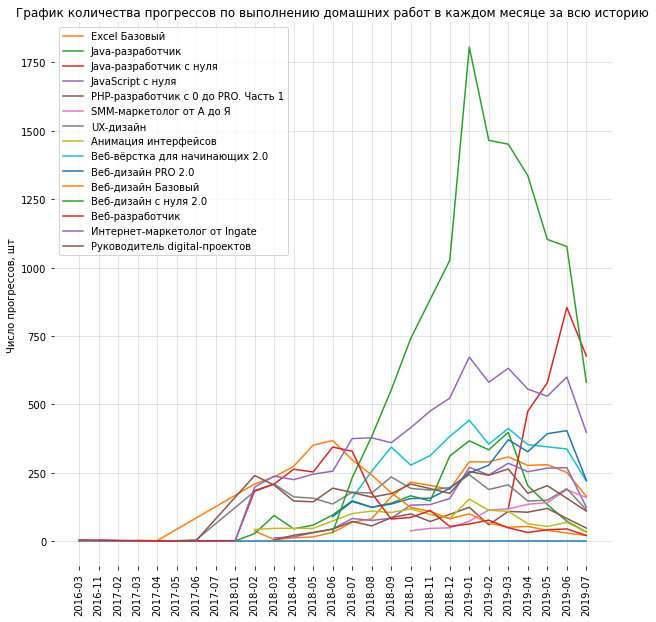

In [41]:
# Построение графика с разметкой по датам. Далее производим присовение значений по оси Х и по оси У.
# Запускаем цикл с присвоением занчений по оси Х и по оси У по каждому значению в списке курсов

fig,subplot = plt.subplots(figsize = (10,10))  
x_ticks = graph_done.index.levels[1]           
y_ticks = [0 for i in range(len(x_ticks))]     
subplot.plot(x_ticks, y_ticks)                 

for i in graph_done.index.levels[0]:           
    y_ticks = graph_done.loc[i,'counter']     
    x_ticks = graph_done.loc[i].index          
    graph = subplot.plot(x_ticks,
                         y_ticks, label = i) 


x_labels = [i for i in graph_done.index.levels[1]]  
plt.xticks(graph_done.index.levels[1],
           rotation = 'vertical',
           labels = x_labels)                       
subplot.set_title('График количества прогрессов по выполнению домашних работ в каждом месяце за всю историю') #Установка заголовка
subplot.set_ylabel('Число прогрессов, шт') # Подпись оси У
plt.legend()   # Команда для расположения легенды на графике 
plt.grid(color='grey',
         linestyle='-',
         linewidth=1,
         alpha = 0.2)                
plt.box(on = None)                       
plt.show()          

# 2.7. Выводы

1. Наблюдается сезонность, основные приросты студентов наблюдаются в зимнее время начиная с ноября-декабря. В летние месяцы заметно снижение прироста судентов.
2. Можно так же заметить сезонность количества выполняемых заданий. Основной пик совпадает с периодом набора новых студентов в начале года, снижение прогрессов наблюдается в летние периоды. По некоторым курсам снижение наблюдается в период начала нового учебного года, вероятно это зависит от совмещающих с учебой студентов.
3. Наибольшие показатели здесь имеют одни из самых объемных по числу студентов курсы "Веб-дизайн с нуля 2.0" и "Интернет-маркетолог от Ingate".
4. Наибольшая загруженность преподавателей наблюдается в периоды наибольшего прироста студентов, которые наблюдаются с ноября по февраль, периоды разгрузки преподавателей можно наблюдать в летние месяцы. Заметна тенденция к "накоплению" нагрузки посредством работ, выполнение которых занимает более месяца.

## 3. Выявление проблемных модулей

1. **(p)** Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле
2. **(m)** На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки
3. **(p)**  Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса. 
4. **(m)** На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно  ⭐
5. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

# 3.1. Рассчитать минимальное, максимальное, среднее, медианное время прохождения каждого модуля (разность между временем начала и окончания выполнения домашней работы) для каждого курса. Если домашних заданий в модуле несколько, то считать разность между временем начала выполнения первой домашней работы и временем окончания выполнения последней домашней работы в модуле

In [42]:
 # Создание нового датасета без NaN- значений
# Форматирование столбца дат b uруппировка датасета с агрегацией выполняющей создание новых столбцов с датами начала и окончания прохождения модулей
problem_df = main_df.dropna()

problem_df['finish_date'] = problem_df.loc[:,'finish_date'].map(lambda x: 
                                                                dt.strptime(re.split('[.+]',
                                                                                     str(x))[0],
                                                                            '%Y-%m-%d %H:%M:%S')) 
problem_df = problem_df.groupby(['title',
                                 'module_title',
                                 'module_number',
                                 'student_id']).agg(module_start = ('start_date','min'),
                                                 module_finish = ('finish_date','max'))



C:\Users\altynbek\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [43]:
# Добавление столбца содержащего разность между датами начала и окончания прохождения модулей
# Форматирование столбца содержащего время прохождения модулей в количество секунд
problem_df['delta'] = problem_df['module_finish'] - problem_df['module_start']
problem_df['delta'] = problem_df.loc[:,'delta'].map(lambda x: x.days)

In [44]:
# Группировка датасета с агрегацией выполняющей создание новых столбцов с соответствующими функциями
problem_df_graph = problem_df.groupby(['title','module_title']).agg(min_time = ('delta', 'min'),
                                                             max_time = ('delta', 'max'),
                                                             mean_time = ('delta', 'mean'),
                                                             median_time = ('delta', 'median'))
problem_df_graph

min_time  \
title                         module_title                                                   
Excel Базовый                  Визуализация данных Excel                                 0   
                              Основной функционал Excel                                  0   
                              Основной функционал Excel (продолжение)                    0   
                              Сводные таблицы Excel                                      0   
                              Формулы и функции Excel. Более сложные формулы             0   
...                                                                                    ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                          0   
                              Требовательность digital-продюсера                         0   
                              Управление временем                                        0   
                              Управление дизайнерами. Разработка дизайна по s...         0   
                              Экологичный путь менеджера                                -1   

                                                                                  max_time  \
title                         module_title                                                   
Excel Базовый                  Визуализация данных Excel                               179   
                              Основной функционал Excel                                390   
                              Основной функционал Excel (продолжение)                  274   
                              Сводные таблицы Excel                                    269   
                              Формулы и функции Excel. Более сложные формулы           294   
...                                                                                    ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                        215   
                              Требовательность digital-продюсера                       397   
                              Управление временем                                      256   
                              Управление дизайнерами. Разработка дизайна по s...       199   
                              Экологичный путь менеджера                               464   

                                                                                  mean_time  \
title                         module_title                                                    
Excel Базовый                  Визуализация данных Excel                          12.800813   
                              Основной функционал Excel                           27.845361   
                              Основной функционал Excel (продолжение)             11.884211   
                              Сводные таблицы Excel                               13.850467   
                              Формулы и функции Excel. Более сложные формулы      14.668810   
...                                                                                     ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                   26.990099   
                              Требовательность digital-продюсера                  29.750000   
                              Управление временем                                 21.885714   
                              Управление дизайнерами. Разработка дизайна по s...  21.000000   
                              Экологичный путь менеджера                          22.323718   

                                                                                  median_time  
title                         module_title                                                     
Excel Базовый                  Визуализация данных Excel                                  6.0  
                              Основной функционал Excel                                   8.0  
                

# 3.2. На основании первого пункта построить line-graph с медианным временем прохождения каждого модуля для каждого курса. 15 графиков. Графики должны иметь заголовки

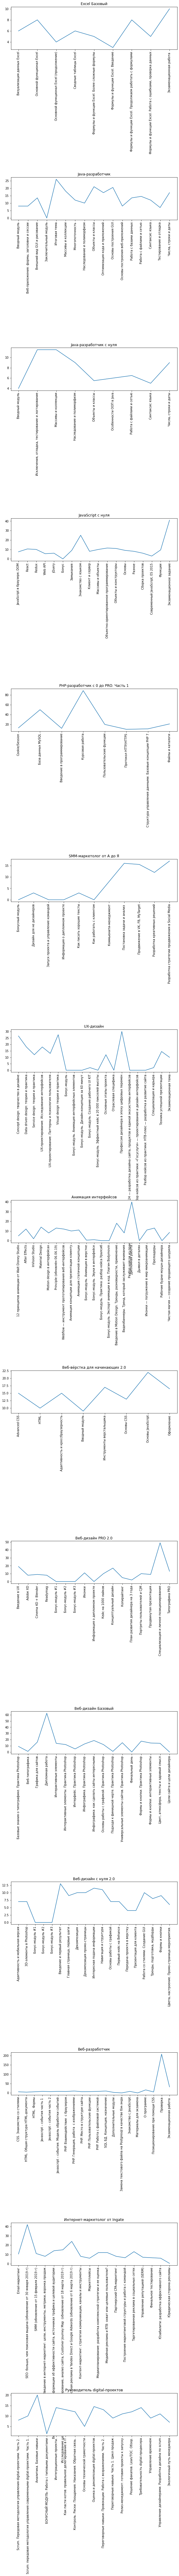

In [45]:
# Определение переменной для счетчика порядкового номера координатной оси, далее запускаем цикл по каждому значению в списке курсов
# Формирование линейного графика по заданным значениям

fig = plt.figure(figsize = (10,150))                        
s = 0                                                       
for i in list(problem_df_graph.index.levels[0]):            
    s+=1                                                    
    subplot = fig.add_subplot(15,1,s)                       
    x_ticks = problem_df_graph.loc[i].index                 
    y_ticks = problem_df_graph.loc[i,'median_time']         
    x_labels = [i for i in problem_df_graph.loc[i].index]   
    subplot.plot(x_ticks, y_ticks)                          
    subplot.set_title(i)                                    
    plt.xticks(problem_df_graph.loc[i].index,
               rotation = 'vertical',
               labels = x_labels)      
plt.subplots_adjust(wspace=1, hspace=3)  
plt.show()                 

# 3.3. Чтобы выявить сезонность, посчитать медианное время выполнения домашней работы по месяцам (12 месяцев, январь-декабрь) для каждого курса.

In [46]:
# Форматирование столбца с датой выполнения задания в порядковый номер месяца
problem_df['module_finish'] = problem_df.loc[:,'module_finish'].map(lambda x: dt.strftime(x,'%m'))
# Группировка датасета по месяцам с агрегацией выполняющей создание новых столбцов с соответствующими функциями
problem_df_sea = problem_df.groupby(['title','module_finish']).agg(min_time = ('delta', 'min'),
                                                             max_time = ('delta', 'max'),
                                                             mean_time = ('delta', 'mean'),
                                                             median_time = ('delta', 'median'))
problem_df_sea

min_time  max_time  mean_time  \
title                         module_finish                                  
Excel Базовый                 01                    0       159  12.482890   
                              02                    0       225  17.359517   
                              03                    0       232  21.357527   
                              04                    0       213  19.541284   
                              05                    0       332  26.518182   
...                                               ...       ...        ...   
Руководитель digital-проектов 08                    0       188  28.557692   
                              09                    0       203  25.586207   
                              10                    0       229  26.565574   
                              11                    0       260  25.902857   
                              12                    0       240  21.874251   

                                             median_time  
title                         module_finish               
Excel Базовый                 01                     5.0  
                              02                     7.0  
                              03                     6.0  
                              04                     6.0  
                              05                     6.0  
...                                                  ...  
Руководитель digital-проектов 08                    17.0  
                              09                    13.0  
                              10                    11.5  
                              11                     9.0  
                              12                    11.0  

[171 rows x 4 columns]

# 3.4.  На основании третьего пункта построить line-graph, на который будут нанесены линии для каждого курса с медианным временем выполнения домашней работы по месяцам. 15 линий на графике. График должен иметь заголовок. Ось, отражающая время прохождения, должна быть подписана. Линия для каждого курса должна иметь свой цвет (нужна легенда). Рамок у графика быть не должно 

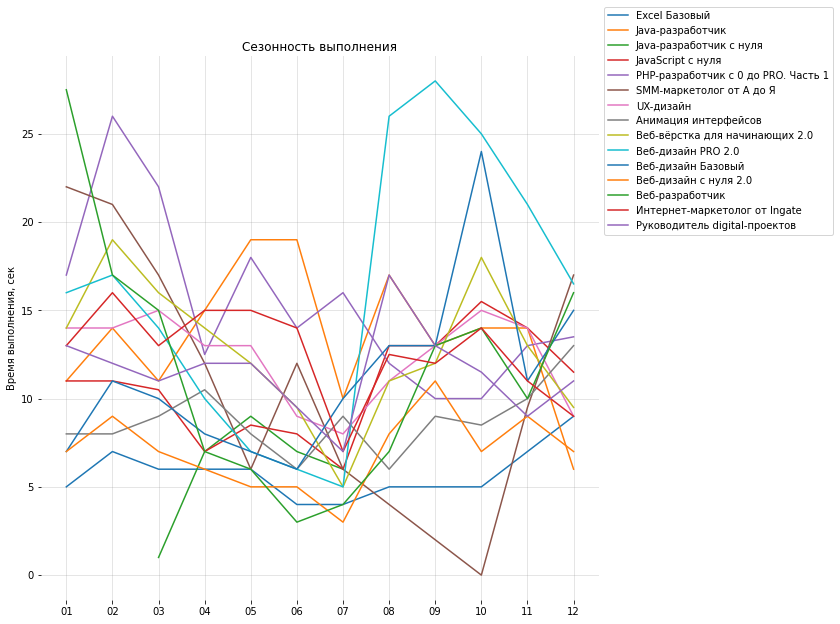

In [50]:
# Присвоение значений по оси Х и по оси Y
# Формирование линейного графика по заданным значениям и расположение легенды на график

fig, subplot = plt.subplots(figsize = (10,10))     
for i in problem_df_sea.index.levels[0]:         
    y_ticks = problem_df_sea.loc[i,'median_time']  
    x_ticks = problem_df_sea.loc[i].index         
    subplot.plot(x_ticks, y_ticks, label = i)      
plt.legend(loc = 'best',          
          bbox_to_anchor=(1, 0.1, 0, 1))           
subplot.set_ylabel('Время выполнения, сек')        
subplot.set_title('Сезонность выполнения')         
plt.grid(color='grey',
         linestyle='-',
         linewidth=1,
         alpha = 0.2)   
plt.box(on = None)     
plt.show()          

# 3.5.  Аналитические выводы

1. На основании данных на графике “Сезонность выполненя” наблюдается тенденция основного количества курсов к увеличению медианного времени начиная с ноября по февраль, что имеет зависимость с приходом новых студентов. Сезон учебы длиться в первое полугодие, но при этом на графике видны большие разрывы на курсах Java-разработчик с нуля и SMM-маркетолог от А до Я.
2. Согласно данным, выполнение домашней работы связанные с разработкой, обладют свойством модулей от простого к сложному, где время выполнения домашнего задания увеличивается по мере прохождения по модулям. Дольше всего выполняют модули по направлению дизайна и разработки, быстрее всего завершают модули по направлению марткетинга и бизнесу.
3. Общая картина медианной величины затраченного времени на выполнение модулей на каждом из курсов не показывает больших различий между курсами, за исключением курса "SMM-маркетолог от А до Я" в котором имеется модуль ""Информация о дипломном проекте", по видимости, на прохождение которого было затрачено очень мало времени.


## 4. Расчет конверсии

1. **(p)** Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).
2. **(m)** Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы
3. **(m)** Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно ⭐
4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

# 4.1. Посчитать конверсию перехода студентов из одного модуля в другой на каждом курсе. Формула: отношение количества студентов, приступивших к выполнению домашнего задания в этом модуле (если дз в модуле несколько, то считать по первому дз в модуле), к количеству студентов, сдавших задание в предыдущем модуле (если дз в модуле несколько, то считать по последнему дз в модуле).


In [52]:
# Создание нового датасета из основного без пропущенных значений для подсчета студентов выполнивших задания
conv_df_done = main_df.copy()

# Выполнение условия по датасету в котором все уроки являются домашними заданиями
conv_df_done = conv_df_done[conv_df_done.loc[:,'is_homework'] == True]

# Выполнение условия по датасету в котором все домашние задания являются выполненными
conv_df_done = conv_df_done[conv_df_done['status'] == 'done']

# Группировка датасета по номеру урока в каждом модуле каждого курса с агрегацией подсчета суммы уникальных студентов
conv_df_done = conv_df_done.groupby(['title', 'module_number', 'module_title', 'lesson_number']).agg(count_stud = ('student_id',
                                                                                                        'nunique'))
# Конвертация индексов 4 уровней в названия столбцов
conv_df_done.reset_index(level=[0,1,2,3], inplace = True)

# Создание датасета в котором содержатся номера последних уроков каждого модуля
conv_df_last = conv_df_done.groupby(['title', 'module_number', 'module_title']).agg(lesson_number = ('lesson_number', 'max'))

# Создание нового датасета из основного для подсчета всех студентов с заданиями в любом статусе
conv_df_start = main_df.copy()

# Выполнение условия по датасету в котором все уроки являются домашними заданиями
conv_df_start = conv_df_start[conv_df_start.loc[:,'is_homework'] == True]

# Группировка датасета по номеру урока в каждом модуле каждого курса с агрегацией подсчета суммы уникальных студентов
conv_df_start = conv_df_start.groupby(['title', 'module_number', 'module_title', 'lesson_number']).agg(count_stud = ('student_id',
                                                                                                           'nunique'))
# Конвертация индексов 4 уровней в названия столбцов
conv_df_start.reset_index(level=[0,1,2,3], inplace = True)

# Создание датасета в котором содержатся номера первых домашних заданий каждого модуля
conv_df_first = conv_df_start.groupby(['title', 'module_number', 'module_title']).agg(lesson_number = ('lesson_number', 'min'))

# Конвертация индексов 3 уровней в названия столбцов
conv_df_first.reset_index(level=[0,1,2], inplace = True)

# Конвертация индексов 3 уровней в названия столбцов
conv_df_last.reset_index(level=[0,1,2], inplace = True)

# Объединение датасета содержащего последние уроки с датасетом студентов закончивших модуль
conv_df_done = conv_df_last.merge(conv_df_done, how = 'left')

# Переименование столбцов для корректного объединения
conv_df_done.rename(columns={'lesson_number': 'lesson_last', 'count_stud': 'count_stud_done'}, inplace=True)

# Объединение датасета содержащего первые первые домашние задания с датасетом студентов 
conv_df_start = conv_df_first.merge(conv_df_start, how = 'left')

# Переименование столбцов для корректного объединения
conv_df_start.rename(columns={'lesson_number': 'lesson_first', 'count_stud': 'count_stud_start'}, inplace=True)

# Объединение в один общий датасет
conv_df = conv_df_start.merge(conv_df_done, how = 'left')

# Удаление столбцов с уроками
del conv_df['lesson_first']
del conv_df['lesson_last']

# Перемещение столбца с количеством студентов закончивших последний урок на кажом курсе на 1 позицию вверх
conv_df.count_stud_done = conv_df.count_stud_done.shift(1)

# Создание столбца содержащего конверсию студентов на каждом модуле
conv_df['conv'] = conv_df['count_stud_start'] / conv_df['count_stud_done']

# Установка индексов 2-х уровней в датасете
conv_df.set_index(['title','module_title'], inplace = True)

# Удаление строки с первым модулем на каждом курсе
for i in list(conv_df.index.levels[0]):
    conv_df.drop(index = conv_df.loc[i].index[0], level = 1, inplace = True)
    
# Заполнение Nan-значений значением 0
conv_df.fillna(0,inplace = True)
conv_df


module_number  \
title                         module_title                                                        
Excel Базовый                 Основной функционал Excel (продолжение)                         2   
                              Формулы и функции Excel. Введение                               3   
                              Формулы и функции Excel. Продолжаем работать с ...              4   
                              Формулы и функции Excel. Более сложные формулы                  5   
                              Формулы и функции Excel. Работа с ошибками, про...              6   
...                                                                                         ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              12   
                              Интеграционные проекты.                                        13   
                              Управление дизайнерами. Разработка дизайна по s...             14   
                              Основы технической грамотности                                 15   
                              Контроль. Риски. Поощрения. Наказания. Обратная...             16   

                                                                                  count_stud_start  \
title                         module_title                                                           
Excel Базовый                 Основной функционал Excel (продолжение)                          434   
                              Формулы и функции Excel. Введение                                398   
                              Формулы и функции Excel. Продолжаем работать с ...               345   
                              Формулы и функции Excel. Более сложные формулы                   298   
                              Формулы и функции Excel. Работа с ошибками, про...               263   
...                                                                                            ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                                 95   
                              Интеграционные проекты.                                           87   
                              Управление дизайнерами. Разработка дизайна по s...                71   
                              Основы технической грамотности                                    66   
                              Контроль. Риски. Поощрения. Наказания. Обратная...                64   

                                                                                  count_stud_done  \
title                         module_title                                                          
Excel Базовый                 Основной функционал Excel (продолжение)                       458.0   
                              Формулы и функции Excel. Введение                             406.0   
                              Формулы и функции Excel. Продолжаем работать с ...            387.0   
                              Формулы и функции Excel. Более сложные формулы                303.0   
                              Формулы и функции Excel. Работа с ошибками, про...            270.0   
...                                                                                           ...   
Руководитель digital-проектов Решение факапов. Lean/TOC. Обзор.                              98.0   
                              Интеграционные проекты.                                        88.0   
                              Управление дизайнерами. Разработка дизайна по s...             69.0   
                              Основы технической грамотности                                 64.0   
                              Контроль. Риски. Поощрения. Наказания. Обратная...             64.0   

                                                                                      conv  
title                         module_title                  

# 4.2. Постройте bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. График должен иметь заголовок. Ticks нужно развернуть так, чтобы они были читаемы

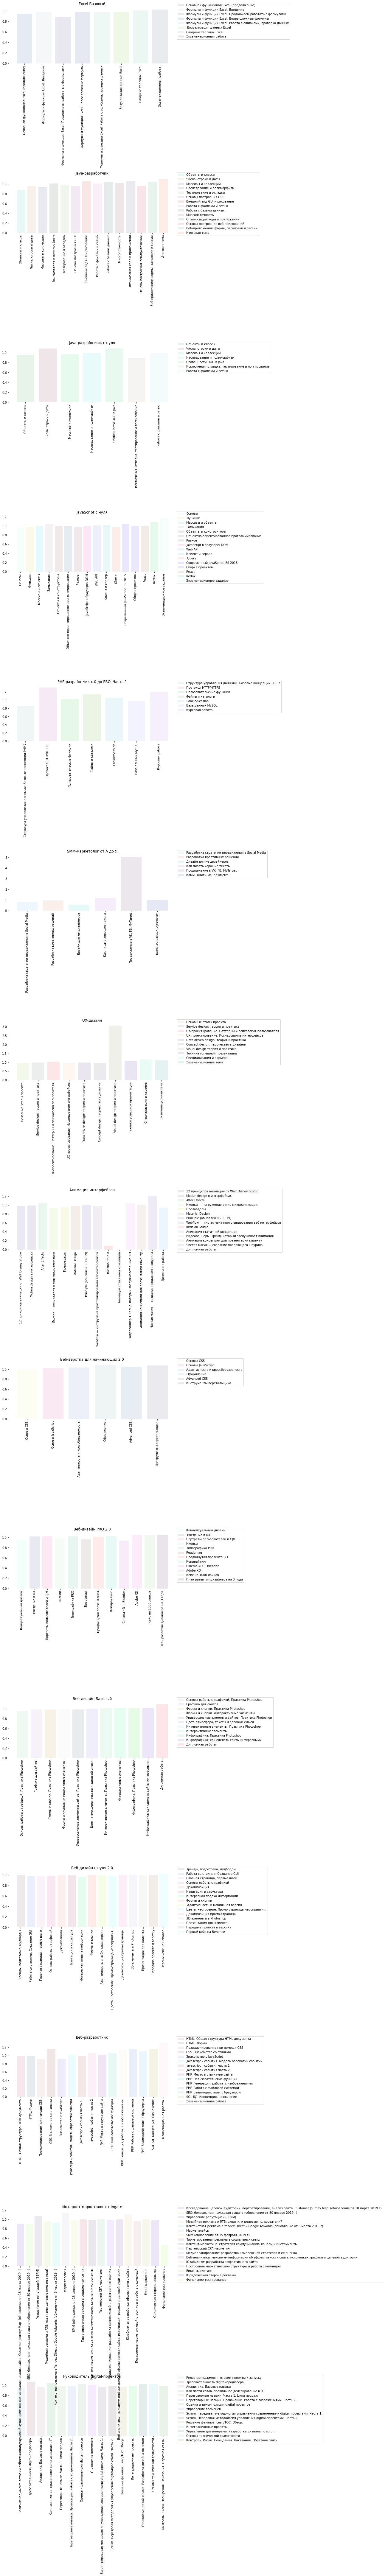

In [55]:
# Создание переменной для счетчика порядкового номера координатной оси
# Запуск цикла по каждому значению в списке курсов
 # Формирование графика по заданным значениям

fig = plt.figure(figsize = (10,150))     
s= 0                                     
for i in list(conv_df.index.levels[0]): 
    s+=1
    subplot = fig.add_subplot(15,1,s)   
    x_labels = [j for j in conv_df.loc[i].index]          
    wedges = subplot.bar(conv_df.loc[i].index,            
                          conv_df.loc[i,'conv'],
                          color = np.random.rand(15, 3),
                          label=x_labels, alpha = 0.1)
    subplot.set_title(i)                    
    plt.box(on=None)                          
    plt.legend(wedges, conv_df.loc[i].index,
              loc="best",
              bbox_to_anchor=(1, 0.1, 0, 1))  
    plt.xticks(conv_df.loc[i].index,
               rotation = 'vertical',
               labels = x_labels)            
plt.subplots_adjust(wspace=0, hspace=2)       
plt.show()  

# 4.3. Постройте горизонтальный (столбцы должны располагаться горизонтально) bar-chart, отражающий конверсию перехода студентов из одного модуля в другой на каждом курсе. 15 графиков. Графики должны иметь заголовки. Ticks должны содержать номер и название модуля. Цвет столбцов графиков должен содержать информацию о сфере, к которой относится курс (нужна легенда). Прозрачность должна стоять на отметке 0.1. На графики должна быть нанесена линия медианы конверсии для каждого курса. У медианы должен быть свой цвет. Рамок у графиков быть не должно

In [56]:
# Создание переменной для счетчика порядкового номера координатной оси и запуск цикла по каждому значению в списке курсов
# Формирование графика по заданным значениям. Вычисление медианного значения конверсии на каждом курсе. 
# Формирование линии медианы на графике.

fig = plt.figure(figsize = (10,300))         
s= 0                                                             
for i in list(conv_df.index.levels[0]):    
    s+=1
    subplot = fig.add_subplot(15,1,s)        
    x_labels = [j for j in conv_df.loc[i].index]        
    wedges = subplot.barh(conv_df.loc[i].index,         
                          conv_df.loc[i,'conv'],
                          color = np.random.rand(15, 3),
                          label=x_labels, alpha = 0.1)
    subplot.set_title(i, fontsize=20)    
    plt.box(on=None)                    
    plt.legend(wedges, conv_df.loc[i].index,   
              loc="best",
              bbox_to_anchor=(1, 0.1, 0, 1), fontsize=18)
    x = np.median(conv_df.loc[i,'conv'])      
    line = subplot.vlines(x,                                  
                      0,
                      1,
                      transform=subplot.get_xaxis_transform(),
                      color='red',
                      label = 'медиана') 
    plt.xticks(fontsize=25)   
    plt.yticks(fontsize=25)   
plt.show()       

# 4.4. На основании рассчитанных значений сделайте аналитический вывод (должен быть полным и покрывать все полученные выше метрики)

На основании выполненных расчетов по конверсии студентов, можно констатировать ряд особенностей для каждого модуля на каждом курсе.
Конверсия имеющая значение больше 1.0 означает, что за выполнение этого модуля принялось большее количество студентов чем количество завершивших предыдущий модуль. Нормальная конверсия равна 1.0, убывающая конверсия < 1.0. В частности:

1.Excel Базовый

Все  модули имеют одинаковый уровень конверсии, за исключением модуля "Формулы и функции Excel. Продолжаем работать с формулами", которая составляет чуть менее медианного значения конверсии, который равен значению несколько меньшему 1.0
2. Java-разработчик
На данном курсе заметны колебания медианного значения конверсии. Здесь можно выделить модуль "Итоговая тема", значение конверсии которого несколько превышает медианное значение, равное чуть больше 1.0. Так же выделяются модули "Веб-приложения: формы, заголовки и сессии", "Оптимизация кода и приложений", "Внешний вид GUI и рисование" немного превышающие значение медианы. Модуль "Объекты и классы" имеет значение конверсии меньше медианного заметнее чем у остальных.
3. Java-разработчик с нуля
Заметное превышение медианного уровня конверсии наблюдается у модулей "Особенности ООП в Java", "Числа, строки и даты". Ниже линии медианы расположился модуль "Исключения, отладка, тестирование и логгирование"
4. JavaScript с нуля
В модуле "Экзаменационное задание" можно наблюдать значительное повышение уровня конверсии относительно медианного значения.
5. PHP-разработчик с 0 до PRO. Часть 1
В модулях "Файлы и каталоги", "Протокол HTTP/HTTPS" заметно небольшое отклонение от медианного значения конверсии в большую сторону. 
5. SMM-маркетолог от А до Я
В этом курсе наблюдаются большие отклонения конверсии. Модуль "Продвижение VK, FB, MyTarget" имеет в разы большую конверсию по сравнению с остальными модулями данного курса. "Дизайн для недизайнеров" обладает заметной отрицательной конверсией.
6. UX-Дизайн
Здесь все модули имеют достаточно одинаковый уровень конверсии равный медианному значению кроме модуля "Data driven design: теория и практика", значение которого превышает медианное почти в 3 раза.
7. Анимация интерфейсов
Здесь можно выделить модуль "Чистая магия-создание продающего шоурила", который имеет заметное превышение конверсии над остальными модулями. Модуль "Анимация статичной концепции" имеет нулевую конверсию, так как в модуле "Invision Studio" помимо очень низкой конверсии, не выполнено ни одного домашнего задания.
8. Веб-вёрстка для начинающих 2.0
На графике незаметны значительные отклонения конверсии.
9. Веб-дизайн PRO 2.0
Небольшое отклонение от медианы в меньшую сторону имеет модуль "Cinema 4D + Blender", а так же "Readymag", "Иконки" и "Концептуальный дизайн".
10. Вэб-дизайн Базовый

Заключительный модуль "Дипломная работа" имеет уровень конверсии несколько больший чем у остальных модулей данного курса.
11. Веб-дизайн с нуля 2.0

Здесь график не имеет значительных отклонений в показателях конверсии модулей от её медианного значения на всем курсе.
12. Веб-разработчик

Модули "Экзаменационная работа", "CSS. Знакомство со стилями" имеют наибольшие показатели в отличие от уровня конверсии всех остальных модулей курса. Наименьшие показатели имеют модули "Знакомство с JavaScript", "Позиционирование при помощи CSS".
13. Интернет-маркетолог от Ingate
На фоне относительно стабильных показателей конверсии у большинства модулей курса, заметно низкие показатели имеет модуль "Финальное тестирование". Модуль "Юзабилитию. Разработка эффективного сайта", "Маркетплейсы", "Управление репутацией (SERM)" имеет незначительное превышение мадианного уровня конверсии.
14. Руководитель DIgital-проектов
График показывает что практически у всех модулей уровень конверсии равен медианному. Небольшое превышение имеют модули "Как пасти котов. Правильное делегирование в IT" и "Требовательность digital-продюсера".
На основании данного анализа, можно заметить, что на каждом курсе медианное значение конверсии приблизительно равно единице. Это означает, что основная масса студентов в равном количестве переходит от модуля к модулю. Так же можно заметить тенденцию к понижению конверсии у модулей, содержащих больше теоретических знаний, чем практических. В разы большую конверсию чем медианное значение имеют модули с наибольшей популярности в использовании на практике.
